# MULTIPLE LINEAR REGRESSION

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Importing inbuilt Boston dataset

In [2]:
##Importing inbuilt dataset

from sklearn.datasets import load_boston
df=load_boston()

In [3]:
## To see different components of dataset that are available
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## 3. Dependent and Independent Variables

In [5]:
##Independent Variables/Target/Response

#1) CRIM       per capita crime rate by town       
#2) ZN         proportion of residential land zoned for lots over 25,000 sq.ft. 
#3) INDUS      proportion of non-retail business acres per town        
#4) CHAS       Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        
#5) NOX        nitric oxides concentration (parts per 10 million)      
#6) RM         average number of rooms per dwelling      
#7) AGE        proportion of owner-occupied units built prior to 1940       
#8) DIS        weighted distances to five Boston employment centres       
#9) RAD        index of accessibility to radial highways       
#10) TAX       full-value property-tax rate per $10,000      
#11) PTRATIO   pupil-teacher ratio by town    
#12) B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town     
#13) LSTAT     % lower status of the population

##Dependent Variable/Features
# MEDV         Median value of owner-occupied homes in $1000's

## 4. Creating DataFrame

In [6]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 5. Getting Information about Dataset

In [7]:
print("Total elements in data:",boston.size,"\n")
print("Dimension of data:",boston.shape,"\n")
print(boston.info())

Total elements in data: 6578 

Dimension of data: (506, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


## 6. Checking for null values

In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## 7. Adding column price to the dataframe

In [9]:
boston['Price']=df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 8. Distribution of Price

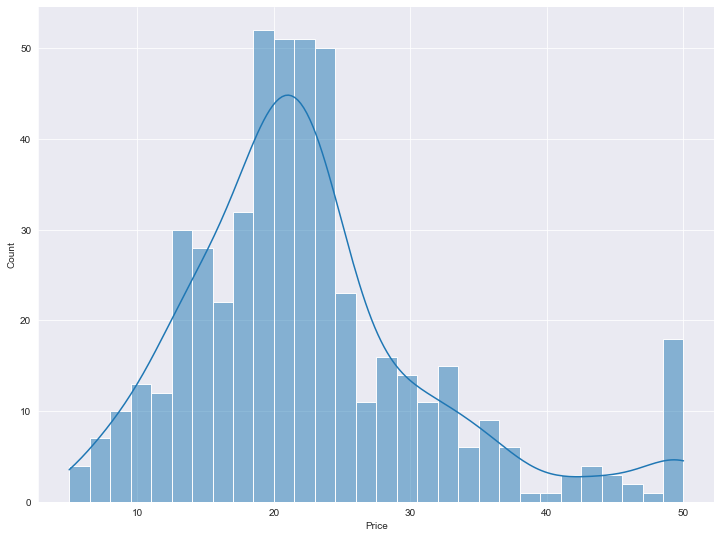

In [10]:
sns.set_style('darkgrid')
f=sns.displot(boston['Price'],kde=True,bins=30)
f.fig.set_size_inches(11, 8)

## 9. Correlation Plot

<AxesSubplot:>

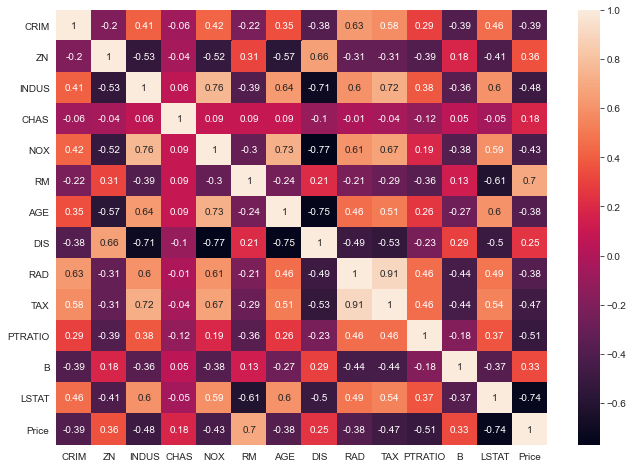

In [11]:
##Correlation plot 
plt.figure(figsize=(11,8))
sns.heatmap(boston.corr().round(2),annot=True)

## 10. Correlation between Target and Features

In [12]:
##Gives Correlation between target and other features
boston.corr()['Price'].sort_values(ascending=True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Price      1.000000
Name: Price, dtype: float64

## 11. Scaling data

In [13]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

# Using fit and transform method 
scaling.fit(boston)
scaled_boston=pd.DataFrame(scaling.transform(boston),columns=boston.columns)

## 12. Setting Independent and dependent values

In [14]:
x=scaled_boston[['LSTAT','PTRATIO' ,'INDUS','TAX','NOX','CRIM','RAD','AGE','CHAS','DIS','B','ZN','RM']]
y=scaled_boston[['Price']]

## 13. Splitting data as train set and test set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


## 14. Fitting Multiple Linear Model

In [16]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

## 15. Model evaluation for training set

In [17]:
y_train_predict=regr.predict(x_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=regr.score(x_test,y_test)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))

print("The model performance for training set")
print("---------------------------------------")
print("RSME is: {}".format(rmse),"\n")
print("Coefficient of determination, R2 is:",r2,"\n")
n=354
p=13
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print("Adjusted R2 is:", adj_r2)


The model performance for training set
---------------------------------------
RSME is: 0.5277589151808841 

Coefficient of determination, R2 is: 0.7836295385076288 

Adjusted R2 is: 0.775356550274097


## 16. Model Evaluation for Test data

In [18]:
y_test_predict=regr.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_r2=regr.score(x_test,y_test)
test_rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))

print("The model performance for training set")
print("---------------------------------------")
print("RSME is: {}".format(test_rmse),"\n")
print("Coefficient of determination, R2 is:",test_r2,"\n")
test_n=152
test_p=13
test_adj_r2=1-((1-test_r2)*(test_n-1)/(test_n-test_p-1))
print("Adjusted R2 is:", test_adj_r2)


The model performance for training set
---------------------------------------
RSME is: 0.48467912945611263 

Coefficient of determination, R2 is: 0.7836295385076288 

Adjusted R2 is: 0.7632468138742896
